<a href="https://colab.research.google.com/github/HongSeongMo/ADP_book_ver01/blob/main/Copy_of_aribnb4%EA%B0%95%EB%B3%80%EC%88%98%EC%83%81%EA%B4%80%EA%B4%80%EA%B3%84%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4강. 변수 상관관계 분석

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Feature 데이터 읽기

In [2]:
import pandas as pd

In [3]:
feature_df = pd.read_csv('drive/MyDrive/letuin/airbnb/data/feature.csv')

feature_df.head()

,id,host_id,neighbourhood_cleansed,accommodates,availability_365,calculated_host_listings_count,minimum_maximum_nights,latitude,number_of_reviews,maximum_minimum_nights,...,host_acceptance_rate,room_entire,room_hotel,room_private,room_shared,response_3d,response_1d,response_3h,response_1h,revenue
0,198258,967537,Barking and Dagenham,1,363,1,100.0,51.53430,41,2.0,...,75.0,0,0,1,0,0,0,0,1,0.0
1,33332,144444,Richmond upon Thames,2,365,2,21.0,51.46410,20,2.0,...,NaN,0,0,1,0,0,0,0,0,0.0
2,42010,157884,Barnet,2,208,2,365.0,51.58590,556,4.0,...,100.0,0,0,1,0,0,0,1,0,0.0
3,284603,1481851,Kensington and Chelsea,3,0,1,365.0,51.51464,6,14.0,...,100.0,1,0,0,0,0,0,0,0,0.0
4,89870,54730,Islington,4,357,3,60.0,51.56792,133,1.0,...,85.0,1,0,0,0,0,0,0,1,0.0


In [4]:
feature_df.shape

(91778, 56)

결측치 처리

결측 데이터 확인

In [5]:
# 결측 데이터  수 확인
col_null = []
for col in feature_df.columns :
    null_count = feature_df[feature_df[col].isnull()].shape[0]
    print(f"{col}:{null_count}")
    if null_count > 0:
        col_null.append(col)

id:0
host_id:0
neighbourhood_cleansed:0
accommodates:0
availability_365:0
calculated_host_listings_count:0
minimum_maximum_nights:1
latitude:0
number_of_reviews:0
maximum_minimum_nights:1
review_scores_value:24123
review_scores_accuracy:24088
review_scores_location:24122
review_scores_checkin:24120
host_listings_count:5
reviews_per_month:24123
review_scores_rating:24061
maximum_nights_avg_ntm:1
maximum_nights:0
minimum_nights:0
number_of_reviews_ltm:0
review_scores_cleanliness:24079
availability_30:0
host_total_listings_count:5
review_scores_communication:24092
calculated_host_listings_count_entire_homes:0
calculated_host_listings_count_private_rooms:0
minimum_nights_avg_ntm:1
availability_90:0
minimum_minimum_nights:1
maximum_maximum_nights:1
longitude:0
calculated_host_listings_count_shared_rooms:0
number_of_reviews_l30d:0
availability_60:0
beds:1117
host_is_superhost:0
host_has_profile_pic:0
host_identity_verified:0
has_availability:0
instant_bookable:0
host_since:0
last_review:0
fi

In [6]:
# 결측치 포함 필드
col_null

['minimum_maximum_nights',
 'maximum_minimum_nights',
 'review_scores_value',
 'review_scores_accuracy',
 'review_scores_location',
 'review_scores_checkin',
 'host_listings_count',
 'reviews_per_month',
 'review_scores_rating',
 'maximum_nights_avg_ntm',
 'review_scores_cleanliness',
 'host_total_listings_count',
 'review_scores_communication',
 'minimum_nights_avg_ntm',
 'minimum_minimum_nights',
 'maximum_maximum_nights',
 'beds',
 'price',
 'host_response_rate',
 'host_acceptance_rate']

결측치 채우기 : .fillna

*   필드의 성격에 따라 채우는 값이 다를 수 있음.
    *   0, 평균, 최소, 최대 등




















In [7]:
#column 구분
null_with_0 = ['host_response_rate','host_acceptance_rate','host_listings_count','host_total_listings_count']
null_with_avg = ['review_scores_accuracy','review_scores_checkin','review_scores_location','review_scores_communication',
                 'review_scores_rating','reviews_per_month','review_scores_value','review_scores_cleanliness',
                 'maximum_nights_avg_ntm','minimum_nights_avg_ntm','maximum_minimum_nights','minimum_maximum_nights',
                 'minimum_minimum_nights', 'maximum_maximum_nights', 'beds'
                 ]


0으로 채우기

In [8]:
#fill null with 0
for col in null_with_0:
    feature_df[col] = feature_df[col].fillna(0)

평균으로 채우기

In [9]:
#fill null with avg
for col in null_with_avg:
    col_avg = feature_df[col].mean()
    feature_df[col] = feature_df[col].fillna(col_avg)

처리 결과 확인

In [10]:
for col in feature_df.columns:
    null_count = feature_df[feature_df[col].isnull()].shape[0]
    print(f"{col}:{null_count}")

id:0
host_id:0
neighbourhood_cleansed:0
accommodates:0
availability_365:0
calculated_host_listings_count:0
minimum_maximum_nights:0
latitude:0
number_of_reviews:0
maximum_minimum_nights:0
review_scores_value:0
review_scores_accuracy:0
review_scores_location:0
review_scores_checkin:0
host_listings_count:0
reviews_per_month:0
review_scores_rating:0
maximum_nights_avg_ntm:0
maximum_nights:0
minimum_nights:0
number_of_reviews_ltm:0
review_scores_cleanliness:0
availability_30:0
host_total_listings_count:0
review_scores_communication:0
calculated_host_listings_count_entire_homes:0
calculated_host_listings_count_private_rooms:0
minimum_nights_avg_ntm:0
availability_90:0
minimum_minimum_nights:0
maximum_maximum_nights:0
longitude:0
calculated_host_listings_count_shared_rooms:0
number_of_reviews_l30d:0
availability_60:0
beds:0
host_is_superhost:0
host_has_profile_pic:0
host_identity_verified:0
has_availability:0
instant_bookable:0
host_since:0
last_review:0
first_review:0
price:4180
host_respon

Feature 기초 통계 : .describe

In [11]:
#피쳐 기초 통계
desc_df = feature_df.describe()
desc_df

,id,host_id,accommodates,availability_365,calculated_host_listings_count,minimum_maximum_nights,latitude,number_of_reviews,maximum_minimum_nights,review_scores_value,...,host_acceptance_rate,room_entire,room_hotel,room_private,room_shared,response_3d,response_1d,response_3h,response_1h,revenue
count,9.177800e+04,9.177800e+04,91778.000000,91778.000000,91778.000000,9.177800e+04,91778.000000,91778.000000,91778.000000,91778.000000,...,91778.000000,91778.000000,91778.000000,91778.000000,91778.000000,91778.000000,91778.000000,91778.000000,91778.000000,9.177800e+04
mean,4.086494e+17,1.656878e+08,3.185698,119.829251,18.886465,2.405303e+05,51.509655,17.969339,10.348126,4.598477,...,60.147105,0.625444,0.002212,0.367637,0.004707,0.037253,0.074974,0.121020,0.432544,6.148898e+01
std,4.383931e+17,1.756558e+08,1.984127,134.902781,66.116782,2.248186e+07,0.048760,43.303948,36.042413,0.461084,...,43.389061,0.484011,0.046979,0.482164,0.068446,0.189382,0.263351,0.326153,0.495431,6.865881e+03
min,1.391300e+04,4.775000e+03,1.000000,0.000000,1.000000,1.000000e+00,51.295937,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2.337095e+07,2.260467e+07,2.000000,0.000000,1.000000,9.000000e+01,51.483430,0.000000,2.000000,4.590000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,5.250171e+07,8.423607e+07,2.000000,63.000000,2.000000,3.650000e+02,51.513800,4.000000,3.000000,4.598477,...,85.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
75%,8.787777e+17,2.795101e+08,4.000000,251.000000,6.000000,1.125000e+03,51.539410,16.000000,5.000000,4.860000,...,99.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00
max,1.042341e+18,5.501019e+08,16.000000,365.000000,595.000000,2.147484e+09,51.681642,1608.000000,1125.000000,5.000000,...,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.401522e+06


Feature 분포 : 히스토그램

Feature 분류 : Binary or Continuous

In [12]:
id_col = ['id', 'host_id', 'neighbourhood_cleansed']

feature_binary = []
feature_continuous = []

for col in desc_df.columns:
    if (col in id_col) | (col == 'revenue'):
        continue
    else:
        if (desc_df.loc['min', col] == 0) & (desc_df.loc['max', col] == 1):
            feature_binary.append(col) # 최솟값이 0이고 최댓값이 1이면 binary로 분류
        else:
            feature_continuous.append(col) #나머지는 continuous로 분류


In [13]:
feature_binary

['host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'has_availability',
 'instant_bookable',
 'room_entire',
 'room_hotel',
 'room_private',
 'room_shared',
 'response_3d',
 'response_1d',
 'response_3h',
 'response_1h']

In [14]:
feature_continuous

['accommodates',
 'availability_365',
 'calculated_host_listings_count',
 'minimum_maximum_nights',
 'latitude',
 'number_of_reviews',
 'maximum_minimum_nights',
 'review_scores_value',
 'review_scores_accuracy',
 'review_scores_location',
 'review_scores_checkin',
 'host_listings_count',
 'reviews_per_month',
 'review_scores_rating',
 'maximum_nights_avg_ntm',
 'maximum_nights',
 'minimum_nights',
 'number_of_reviews_ltm',
 'review_scores_cleanliness',
 'availability_30',
 'host_total_listings_count',
 'review_scores_communication',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'minimum_nights_avg_ntm',
 'availability_90',
 'minimum_minimum_nights',
 'maximum_maximum_nights',
 'longitude',
 'calculated_host_listings_count_shared_rooms',
 'number_of_reviews_l30d',
 'availability_60',
 'beds',
 'host_since',
 'last_review',
 'first_review',
 'price',
 'host_response_rate',
 'host_acceptance_rate']

히스토그램:binary 변수

In [15]:
# 시각화 모듈
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (12,8)

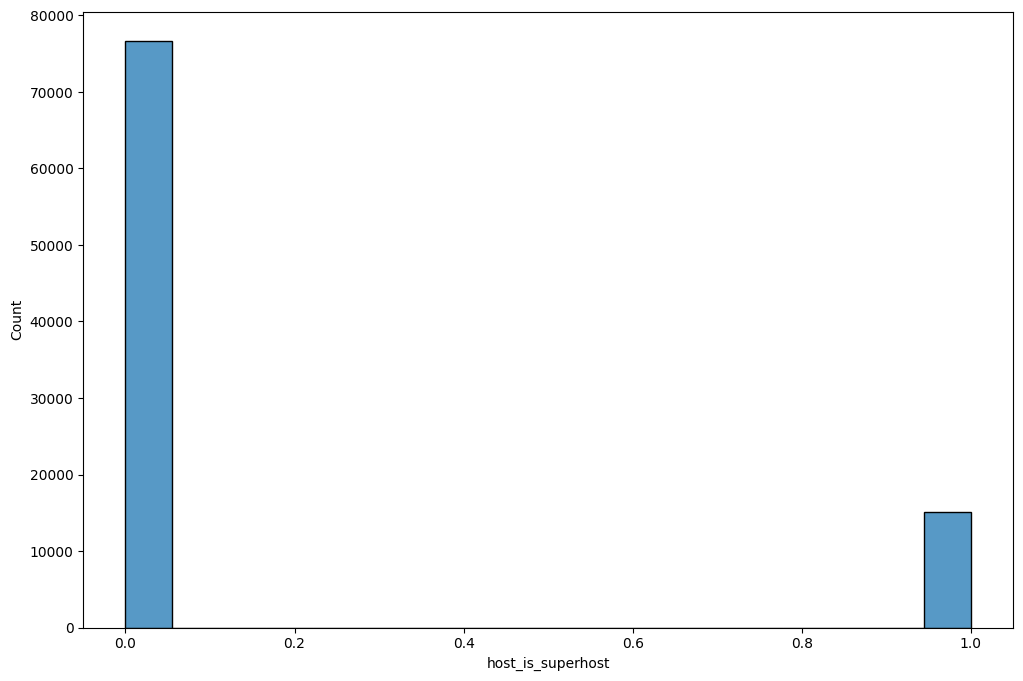

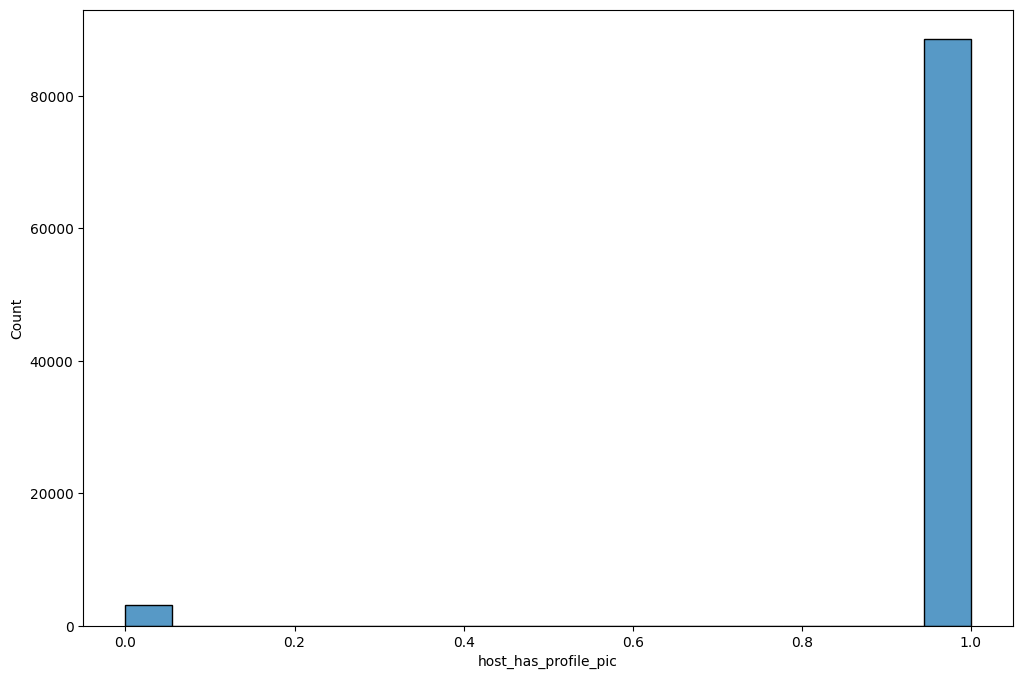

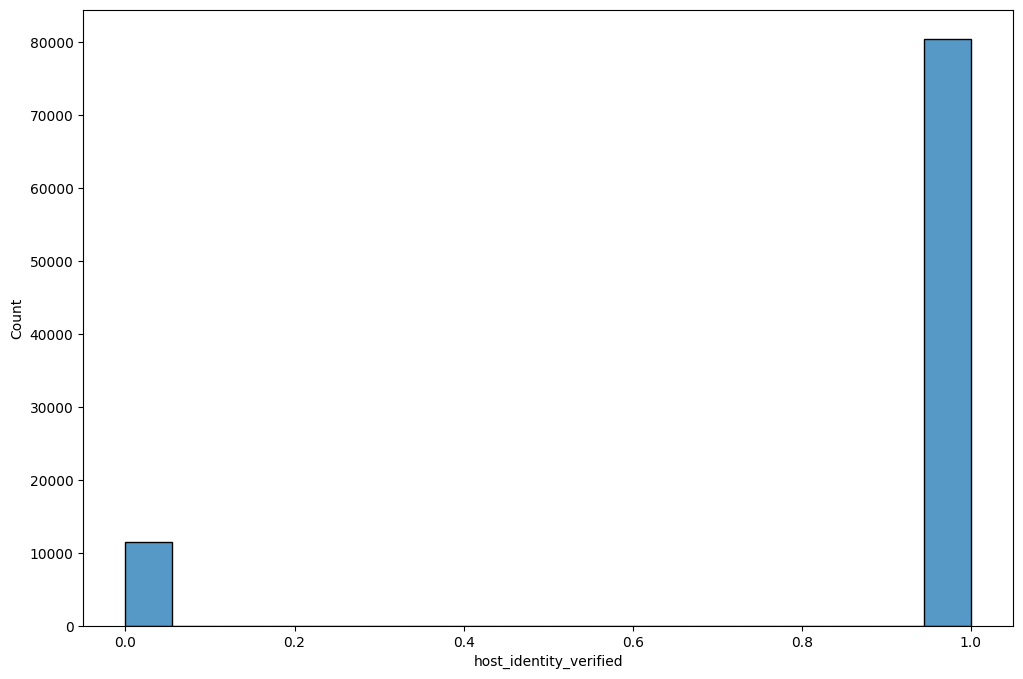

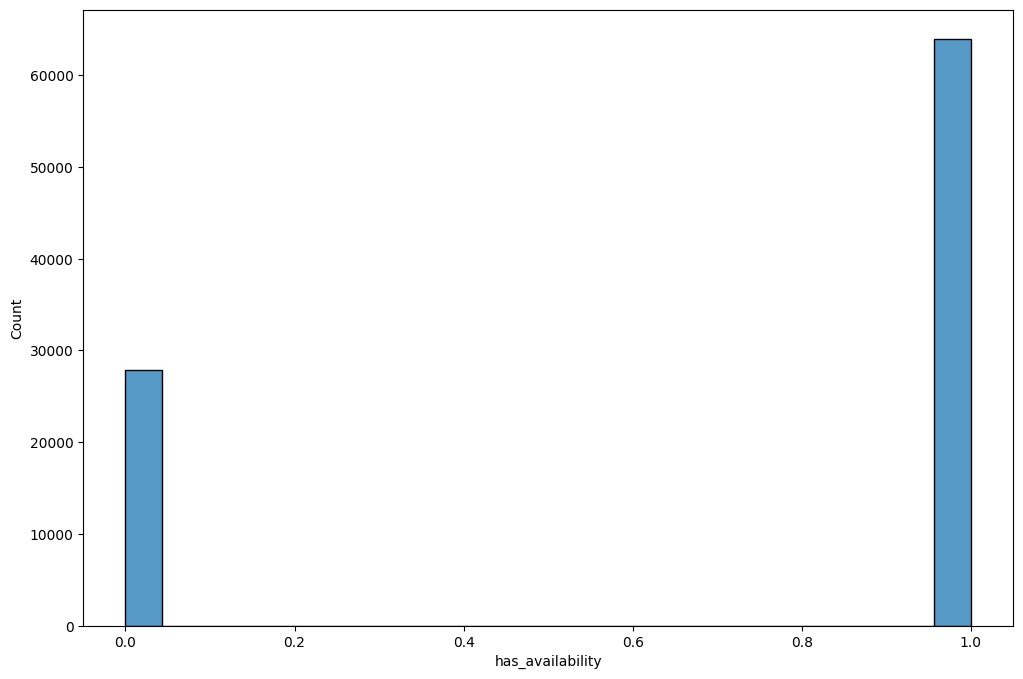

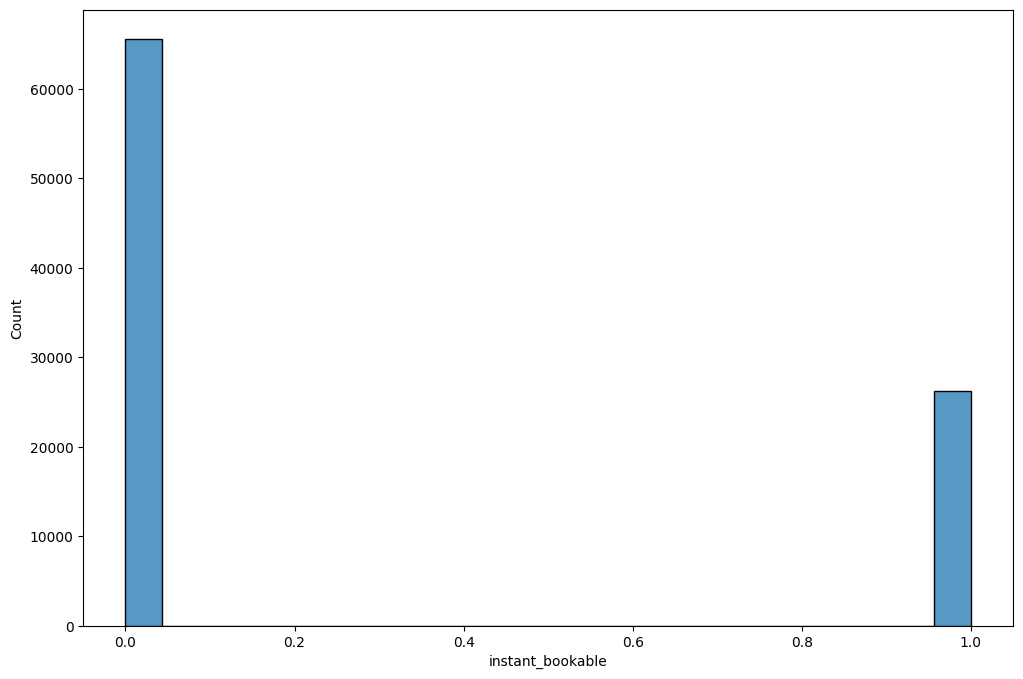

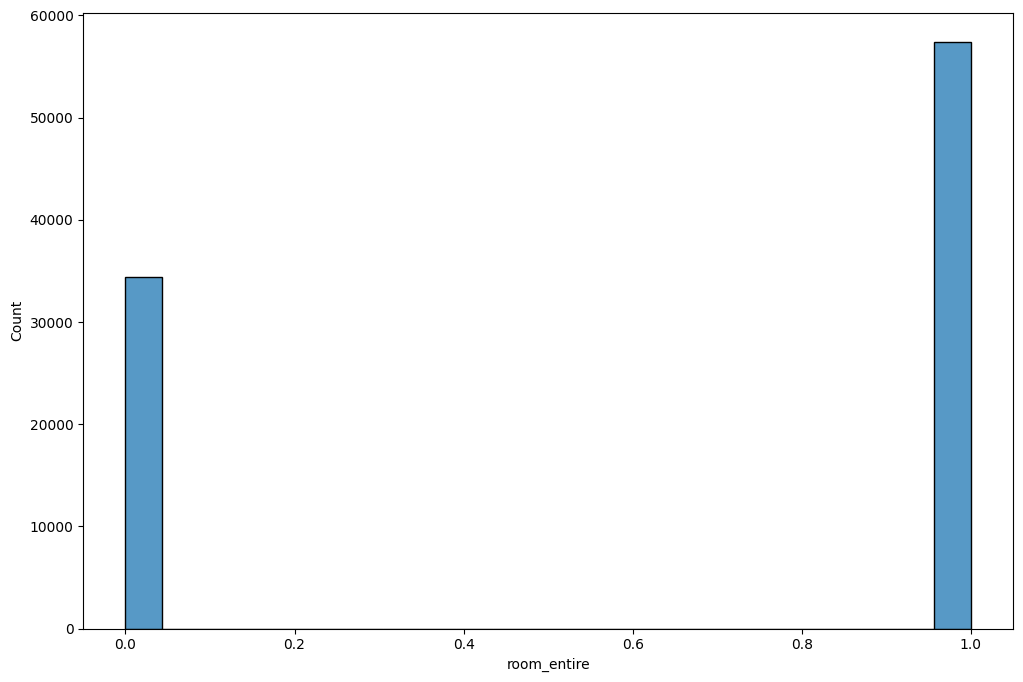

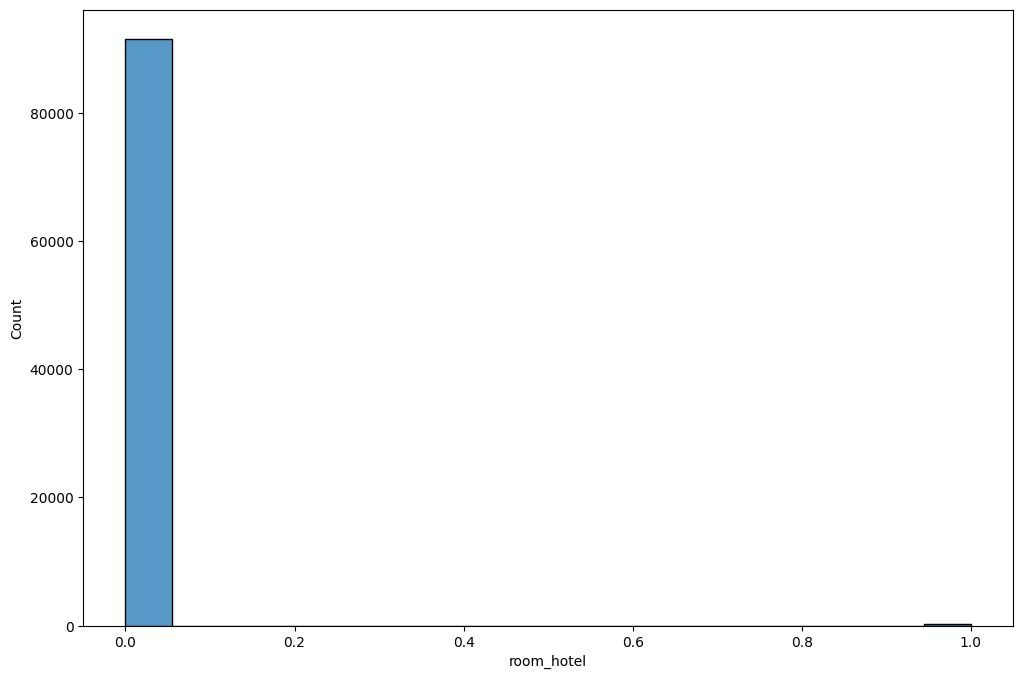

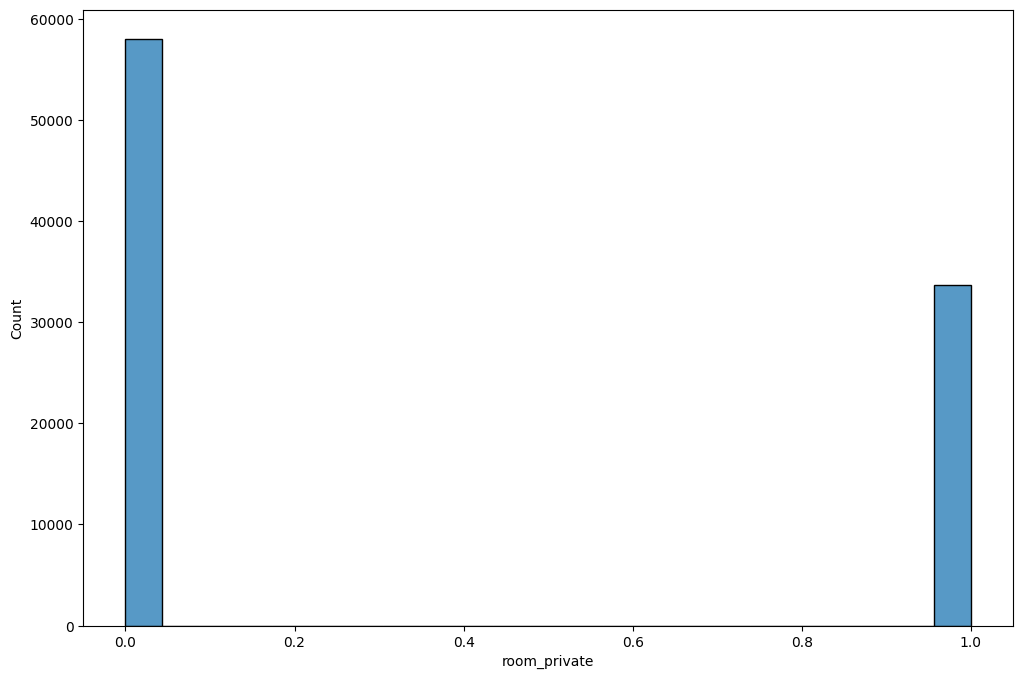

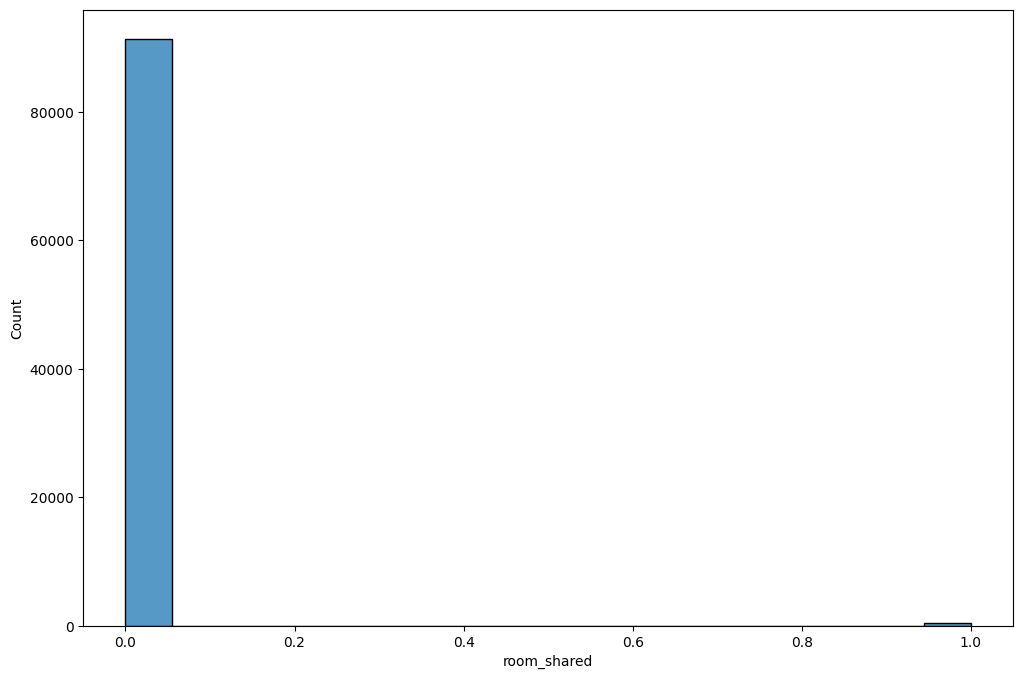

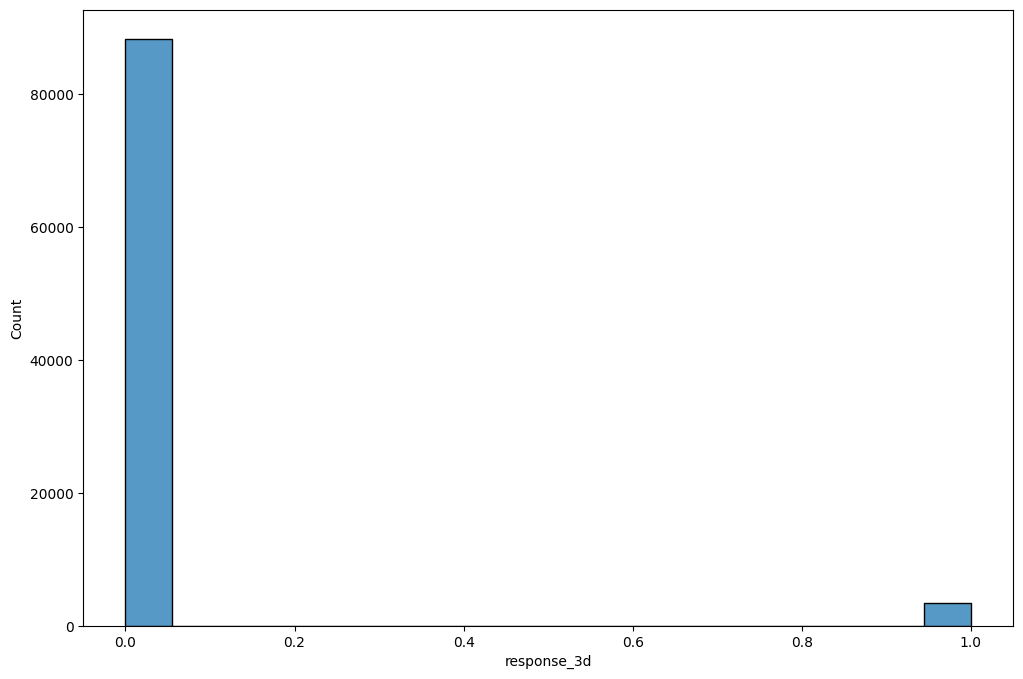

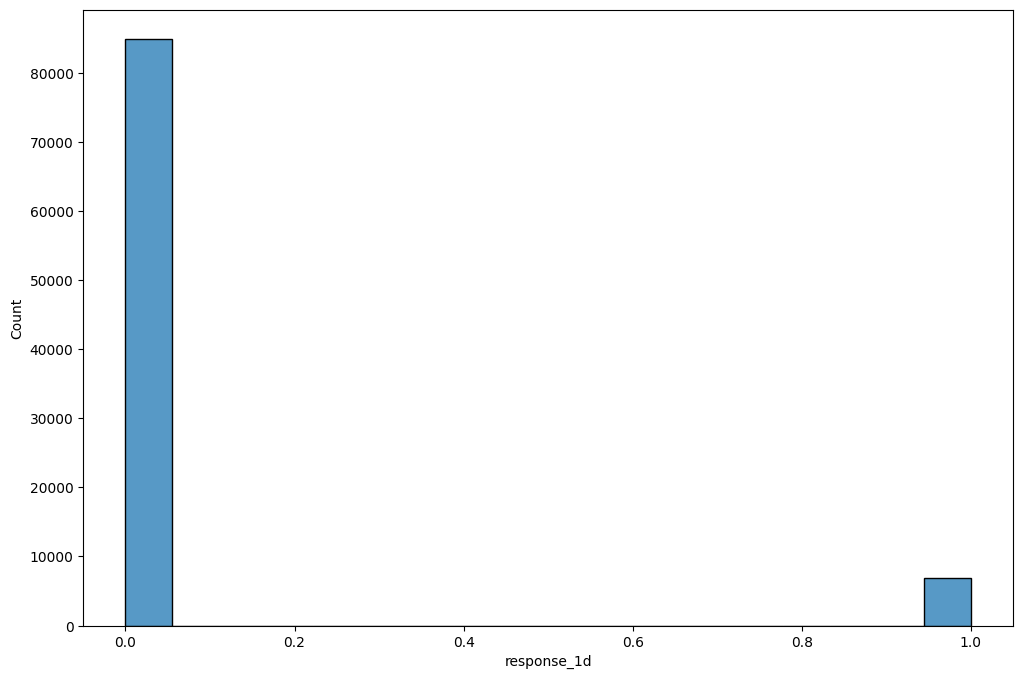

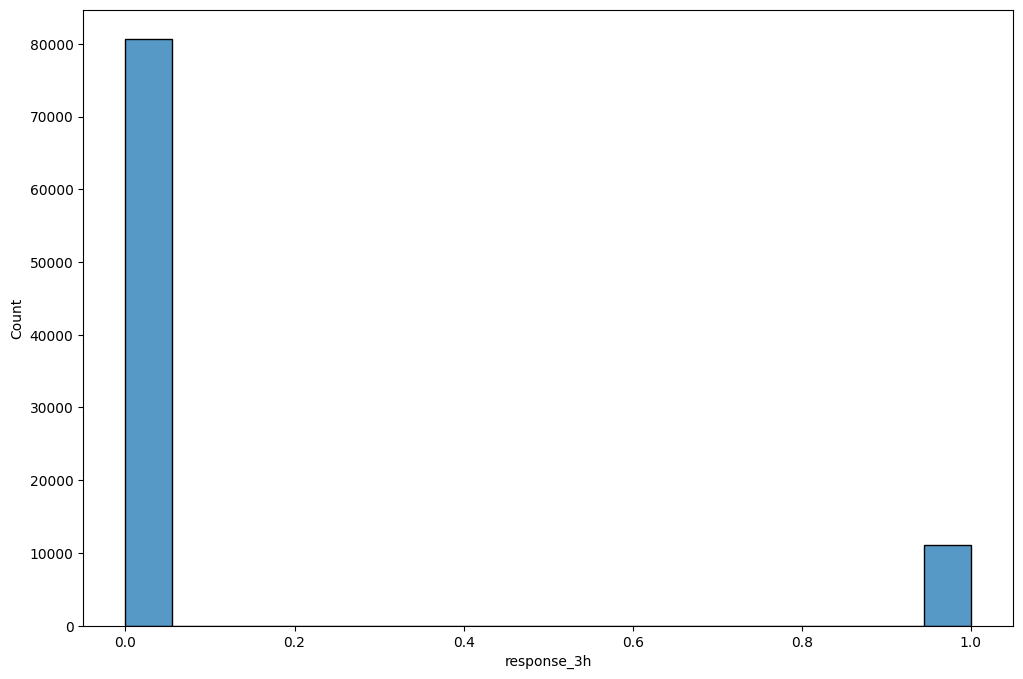

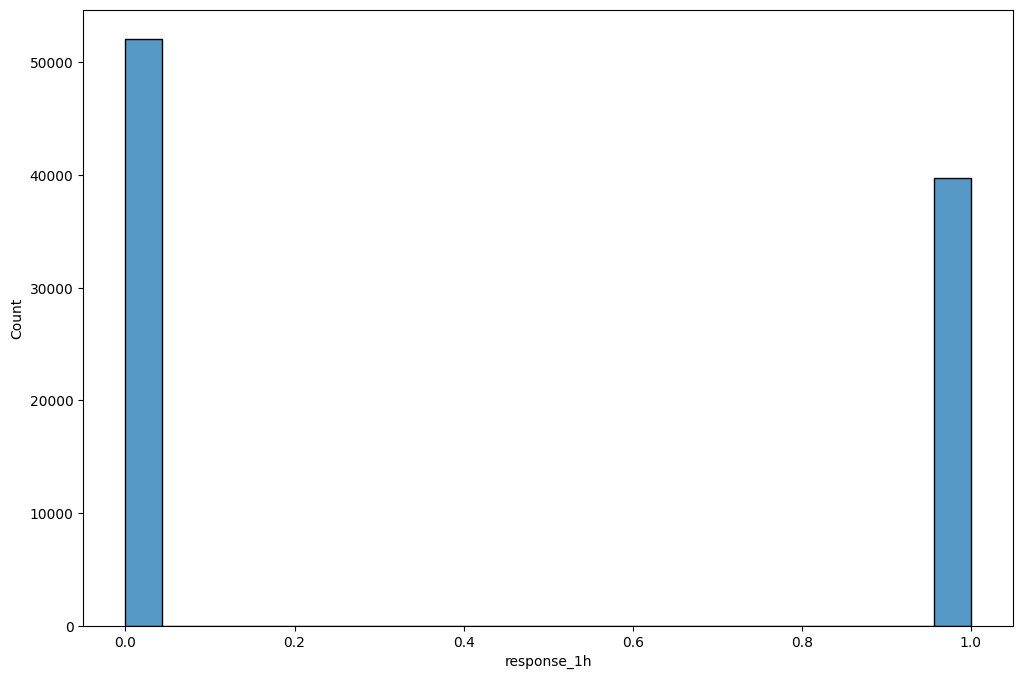

In [17]:
# histogram : binary feature
for col in feature_binary:
    sns.histplot(feature_df[col])
    plt.show()